In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, datetime as dt
from datetime import date
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# Read Data using pandas:

In [2]:
df = pd.read_csv('data.csv')
df.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [3]:
df['date'] = pd.to_datetime(df['date'],format="%d-%m-%Y")
df

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,2020-08-01,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,2020-08-01,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,2020-08-01,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,2020-08-01,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,2020-08-01,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71
...,...,...,...,...,...,...,...,...,...
4566,2021-02-28,campaign 1,adgroup 3,ad 55,19,6,0.07,0,0.00
4567,2021-02-28,campaign 1,adgroup 4,ad 55,1,0,0.00,0,0.00
4568,2021-02-28,campaign 1,adgroup 3,ad 56,16,8,0.12,1,93.20
4569,2021-02-28,campaign 1,adgroup 1,ad 56,37,13,0.23,0,0.00


# Insights:

In [4]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4571 non-null   datetime64[ns]
 1   campaign     4571 non-null   object        
 2   adgroup      4571 non-null   object        
 3   ad           4571 non-null   object        
 4   impressions  4571 non-null   int64         
 5   clicks       4571 non-null   int64         
 6   cost         4571 non-null   float64       
 7   conversions  4571 non-null   int64         
 8   revenue      4571 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 321.5+ KB


In [5]:
df.describe()

,impressions,clicks,cost,conversions,revenue
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340
std,198.349737,100.164913,14.361618,5.223922,1091.742763
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000


In [6]:
df["adgroup"].unique()

array(['adgroup 1', 'adgroup 2', 'adgroup 3', 'adgroup 4'], dtype=object)

Four unique values are found in adgroup

In [7]:
df["ad"].value_counts()

ad 3     617
ad 1     587
ad 2     512
ad 7     461
ad 32    377
        ... 
ad 47      4
ad 31      4
ad 39      4
ad 24      4
ad 51      3
Name: ad, Length: 70, dtype: int64

70 unique ads with their counts that shows which ad is shown more.

In [8]:
df['conversions'].replace(0, 0.1, inplace=True)

In [9]:
df['CTR'] = (df['clicks']/df['impressions'])    #click-through-rate
df['CPC'] = (df['cost']/df['clicks'])   #cost-per-click
df['CPA'] = (df['cost']/df['conversions'])   #cost-per-action
df['ROI'] = (df['revenue']/df['cost'])   #return-on-investment
df.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,CTR,CPC,CPA,ROI
0,2020-08-01,campaign 1,adgroup 1,ad 1,24,6,0.08,0.1,0.00,0.250000,0.013333,0.8000,0.000000
1,2020-08-01,campaign 1,adgroup 2,ad 1,1,0,0.00,0.1,0.00,0.000000,NaN,0.0000,NaN
2,2020-08-01,campaign 1,adgroup 3,ad 1,13,4,0.04,0.1,0.00,0.307692,0.010000,0.4000,0.000000
3,2020-08-01,campaign 1,adgroup 4,ad 1,5,4,0.08,0.1,0.00,0.800000,0.020000,0.8000,0.000000
4,2020-08-01,campaign 1,adgroup 1,ad 2,247,126,1.29,4.0,925.71,0.510121,0.010238,0.3225,717.604651


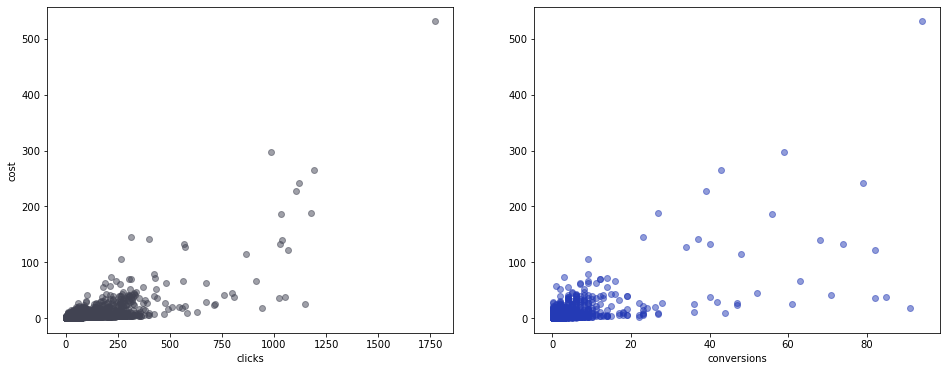

In [10]:
plt.rcParams['figure.figsize'] = [16, 6]

fig, ax = plt.subplots(nrows=1, ncols=2)

ax=ax.flatten()

cols = ['clicks','conversions']
colors=['#414352', '#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('cost')
    i.scatter(df[cols[j]], df['cost'],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j])
    j+=1
    
plt.show()

Figure: (1) shows CPC and here the more the cost, more the clicks. But initially it doesn't seems in that manner. Initially (in cost-axis) we can see that at lower cost also people have tried to click on some particular ad. Thus graph is growing exponentially.



Figure: (2) shows CPA. The higher conversion is better. But in count, we can see after 30, cost-per-conversion points are very less.

It is reassuring that the higher the spend, the more clicks and although less reliably, the more conversions.

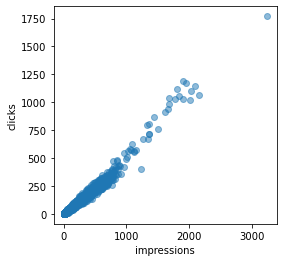

Text(0.5, 0, 'cost')

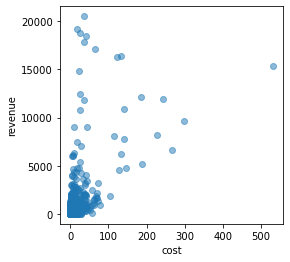

In [11]:
plt.rcParams['figure.figsize'] = [4, 4]
plt.scatter(df['impressions'], df['clicks'], alpha=0.5)
plt.ylabel('clicks')
plt.xlabel('impressions')
plt.show()

plt.scatter(df['cost'], df['revenue'], alpha=0.5)
plt.ylabel('revenue')
plt.xlabel('cost')

Cost vs Impression graph increases linearly and which shows that as many times the ad was shown nearly that many clicks are there on that impression.

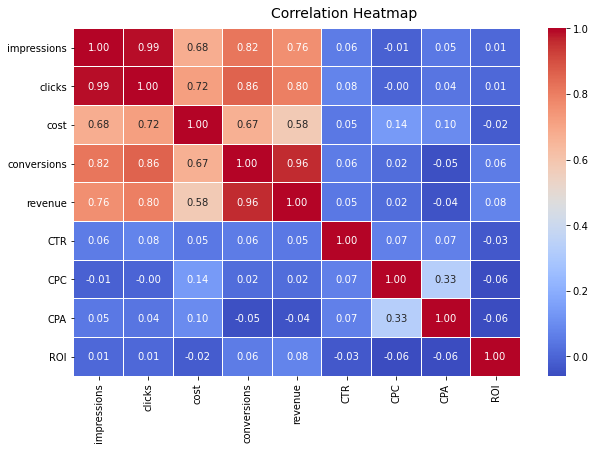

In [12]:
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=14)

Clicks are directly propotional to impressions as well as revenue to conversions which is so obvious. But here we can see that our above discussion of being less reliable, conversion is less related to clicks and impressions. And other factors like CTR, CPC, CPA and ROI are very independent of each other as well as predefined features. This will be helpful during prediction.

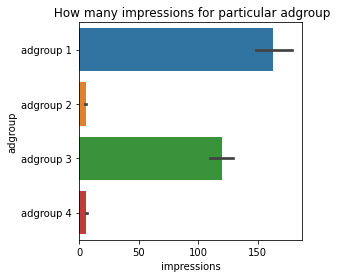

In [13]:
grp = sns.barplot(x = df['impressions'], y=df['adgroup'])
grp.set_title(' How many impressions for particular adgroup');

Most number of impressions is observed in adgroup1 and adgroup3.

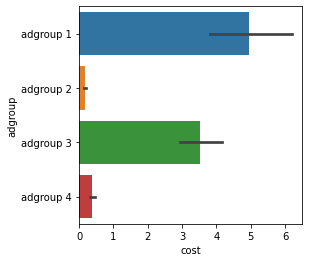

In [14]:
grp = sns.barplot(x = df['cost'], y=df['adgroup'])

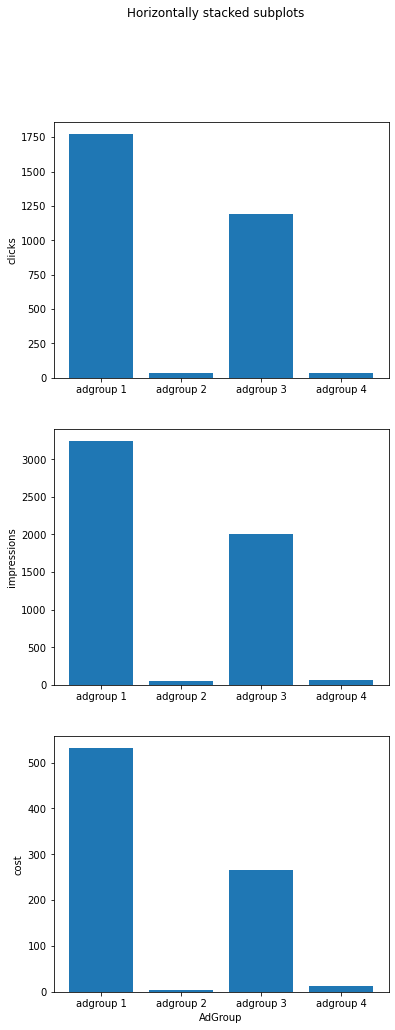

In [15]:
plt.rcParams['figure.figsize'] = [6, 16]


fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.suptitle('Horizontally stacked subplots')
ax3.set_xlabel('AdGroup')
ax1.bar(df['adgroup'], df['clicks'])
ax1.set_ylabel('clicks')
ax2.bar(df['adgroup'], df['impressions'])
ax2.set_ylabel('impressions')
ax3.bar(df['adgroup'], df['cost'])
ax3.set_ylabel('cost')
plt.show()

(array([18475., 18506., 18536., 18567., 18597., 18628., 18659., 18687.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

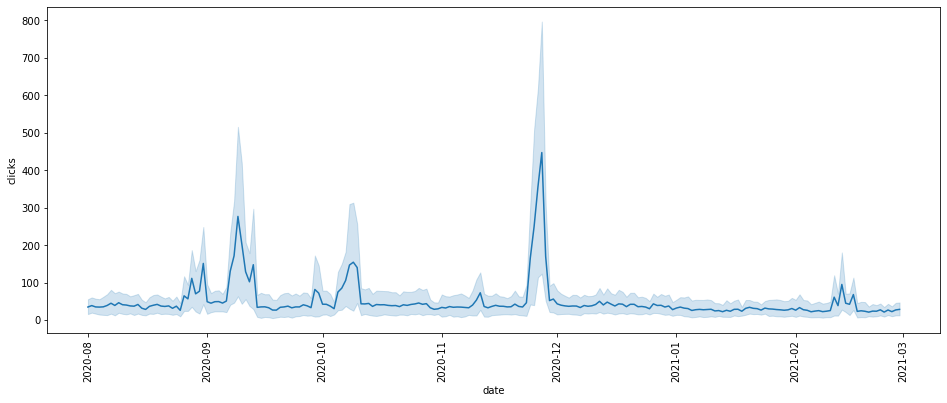

In [16]:
plt.rcParams['figure.figsize'] = [16, 6]
sns.lineplot(x = df.date, y = df['clicks'], data = df['adgroup'])
plt.xticks(rotation=90)

We have more clicks in nearly Dec'20.

# Data Cleaning:

In [17]:
df.isnull().sum()

date             0
campaign         0
adgroup          0
ad               0
impressions      0
clicks           0
cost             0
conversions      0
revenue          0
CTR              0
CPC            444
CPA              0
ROI            444
dtype: int64

In [18]:
df.dropna(inplace = True)
df.isnull().sum()

date           0
campaign       0
adgroup        0
ad             0
impressions    0
clicks         0
cost           0
conversions    0
revenue        0
CTR            0
CPC            0
CPA            0
ROI            0
dtype: int64

In [19]:
df.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,CTR,CPC,CPA,ROI
0,2020-08-01,campaign 1,adgroup 1,ad 1,24,6,0.08,0.1,0.00,0.250000,0.013333,0.8000,0.000000
2,2020-08-01,campaign 1,adgroup 3,ad 1,13,4,0.04,0.1,0.00,0.307692,0.010000,0.4000,0.000000
3,2020-08-01,campaign 1,adgroup 4,ad 1,5,4,0.08,0.1,0.00,0.800000,0.020000,0.8000,0.000000
4,2020-08-01,campaign 1,adgroup 1,ad 2,247,126,1.29,4.0,925.71,0.510121,0.010238,0.3225,717.604651
5,2020-08-01,campaign 1,adgroup 2,ad 2,7,2,0.04,0.1,0.00,0.285714,0.020000,0.4000,0.000000


In [20]:
adgroup = pd.get_dummies(df['adgroup'], 
                                    prefix ='adgroup')
label_encoder = preprocessing.LabelEncoder()
df['ad']= label_encoder.fit_transform(df['ad'])
df = pd.concat([df, adgroup], axis = 1)
df.drop(['adgroup', 'campaign'], axis=1, inplace=True)
df['date']=df['date'].map(dt.datetime.toordinal)

In [21]:
df.shape

(4127, 15)

In [22]:
y = pd.DataFrame([df.impressions, df.clicks, df.conversions, df.revenue]).T
y

,impressions,clicks,conversions,revenue
0,24.0,6.0,0.1,0.00
2,13.0,4.0,0.1,0.00
3,5.0,4.0,0.1,0.00
4,247.0,126.0,4.0,925.71
5,7.0,2.0,0.1,0.00
...,...,...,...,...
4565,10.0,2.0,0.1,0.00
4566,19.0,6.0,0.1,0.00
4568,16.0,8.0,1.0,93.20
4569,37.0,13.0,0.1,0.00


In [23]:
X = df.drop(['impressions', 'clicks', 'conversions', 'revenue','CTR', 'CPC','CPA', 'ROI'], axis = 1, inplace = False)
X

,date,ad,cost,adgroup_adgroup 1,adgroup_adgroup 2,adgroup_adgroup 3,adgroup_adgroup 4
0,737638,0,0.08,1,0,0,0
2,737638,0,0.04,0,0,1,0
3,737638,0,0.08,0,0,0,1
4,737638,11,1.29,1,0,0,0
5,737638,11,0.04,0,1,0,0
...,...,...,...,...,...,...,...
4565,737849,1,0.02,1,0,0,0
4566,737849,50,0.07,0,0,1,0
4568,737849,51,0.12,0,0,1,0
4569,737849,51,0.23,1,0,0,0


In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75, test_size=0.25,
                                                                random_state=42)

In [25]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=75)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_valid)
mean_squared_error(y_valid, y_pred, squared = False), r2_score(y_valid, y_pred, multioutput='raw_values'), regr.score(X_train, y_train)

(201.51885617616773,
 array([0.85423228, 0.83759864, 0.57794088, 0.46688493]),
 0.9670379429095436)

# Performing prediction on Test Data from predict.csv

In [26]:
df_test = pd.read_csv('predict.csv', index_col = 'index')
df_test['date'] = pd.to_datetime(df_test['date'],format="%d-%m-%Y")

In [27]:
df_test.isnull().sum()

date        0
campaign    0
adgroup     0
ad          0
cost        0
dtype: int64

In [28]:
adgroup = pd.get_dummies(df_test['adgroup'], 
                                    prefix ='adgroup')
label_encoder = preprocessing.LabelEncoder()
df_test['ad']= label_encoder.fit_transform(df_test['ad'])
df_test = pd.concat([df_test, adgroup], axis = 1)
df_test.drop(['adgroup', 'campaign'], axis=1, inplace=True)
df_test['date']=df_test['date'].map(dt.datetime.toordinal)

In [29]:
df_test

,date,ad,cost,adgroup_adgroup 1,adgroup_adgroup 2,adgroup_adgroup 3,adgroup_adgroup 4
index,,,,,,,
0,737850,0,0.58,1,0,0,0
1,737850,0,0.17,0,0,1,0
2,737850,0,0.05,0,0,0,1
3,737850,0,0.01,0,1,0,0
4,737850,2,0.01,0,1,0,0
...,...,...,...,...,...,...,...
313,737864,6,0.01,0,0,0,1
314,737864,6,0.01,0,0,1,0
315,737864,6,0.14,1,0,0,0


In [30]:
y_pred_test = regr.predict(df_test)

In [31]:
y_pred_test

array([[8.959000e+01, 3.849000e+01, 2.717000e+00, 5.774568e+02],
       [2.465000e+01, 1.288000e+01, 5.440000e-01, 8.723600e+01],
       [6.660000e+00, 3.070000e+00, 1.000000e-01, 0.000000e+00],
       ...,
       [2.407000e+01, 1.067000e+01, 6.300000e-01, 1.201482e+02],
       [1.227000e+01, 5.270000e+00, 1.360000e-01, 1.545200e+00],
       [5.176000e+01, 2.171000e+01, 1.416000e+00, 2.698975e+02]])

In [32]:
y_pred_df = pd.DataFrame(y_pred_test, columns=['impressions', 'clicks', 'conversions', 'revenue'])
y_pred_df

,impressions,clicks,conversions,revenue
0,89.59,38.49,2.717,577.4568
1,24.65,12.88,0.544,87.2360
2,6.66,3.07,0.100,0.0000
3,2.67,1.11,0.109,0.8460
4,3.10,1.12,0.100,0.0000
...,...,...,...,...
313,3.07,1.12,0.100,0.0000
314,7.60,1.23,0.100,0.0000
315,24.07,10.67,0.630,120.1482
316,12.27,5.27,0.136,1.5452


In [33]:
y_pred_df.to_csv("sample_submission.csv", index = True, index_label='index')